In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **ADABOOST**

Features and labels loaded successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Train Accuracy: 0.63
Test Accuracy: 0.62

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2089
           1       0.64      0.64      0.64      2331
           2       0.49      0.50      0.50      2044
           3       0.45      0.68      0.55      2140
           4       0.68      0.60      0.64      2289
           5       0.38      0.27      0.32      1920
           6       0.98      0.96      0.97      2113
           7       0.46      0.50      0.48      2337
           8       0.35      0.27      0.30      2224
           9       0.91      0.94      0.92      2117

    accuracy                           0.63     21604
   macro avg       0.63      0.63      0.62     21604
weighted avg       0.63      0.63      0.62     21604


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       369
           1       0.62

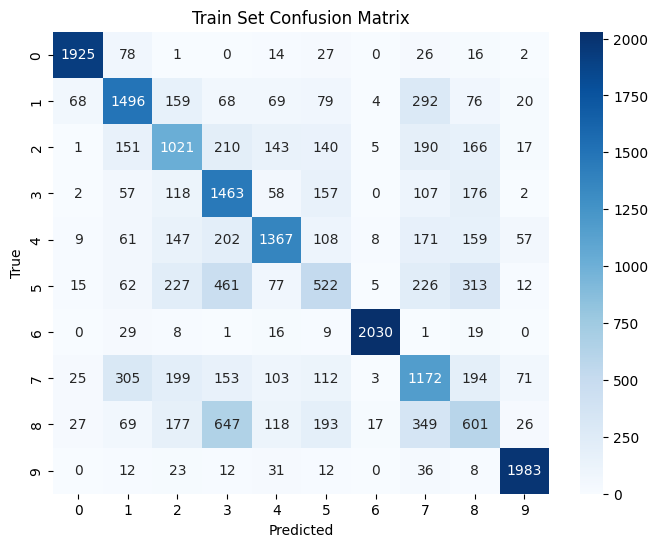


Test Set Confusion Matrix:


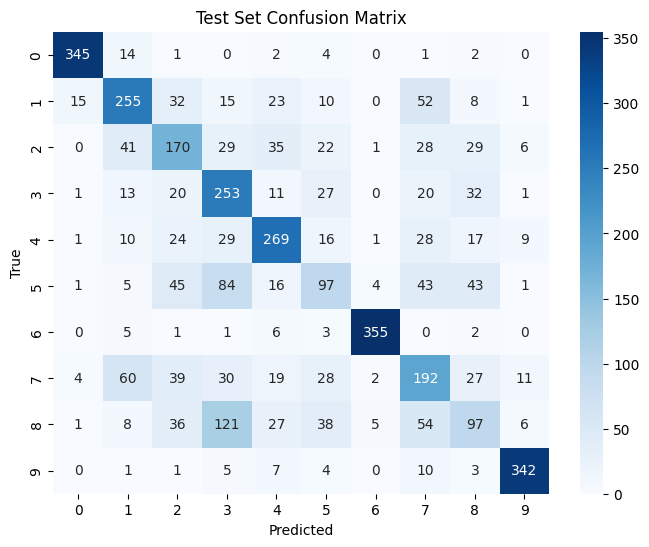

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to load the saved features and labels
inception_train_features_path = '/content/drive/My Drive/Final DataSet/inception_train_features.npy'
inception_test_features_path = '/content/drive/My Drive/Final DataSet/inception_test_features.npy'
train_labels_path = '/content/drive/My Drive/Final DataSet/train_labels.npy'
test_labels_path = '/content/drive/My Drive/Final DataSet/test_labels.npy'

# Load the pre-extracted features and labels
X_train = np.load(inception_train_features_path)
X_test = np.load(inception_test_features_path)
y_train = np.load(train_labels_path)
y_test = np.load(test_labels_path)

print("Features and labels loaded successfully!")

# Train an AdaBoost classifier
ada_model = AdaBoostClassifier(
    n_estimators=100,       # Number of estimators (trees)
    learning_rate=1.0,      # Learning rate
    random_state=42         # Random seed
)
ada_model.fit(X_train, y_train)

# Evaluate on train and test sets
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

# Print performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nTrain Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print("\nTrain Set Confusion Matrix:")
plot_confusion_matrix(train_conf_matrix, "Train Set Confusion Matrix")

print("\nTest Set Confusion Matrix:")
plot_confusion_matrix(test_conf_matrix, "Test Set Confusion Matrix")
